# Polynomial regression

Polynomial regression will allow us to build a nonlinear model by adopting and fitting a polynomial curve.

We have seen how to solve a linear problem. But in everyday life, we meet a lot of other models that are not linear: curves, sinusoids, ...

If we observe the contamination rate of a pandemic, the line will not be linear but will probably look like an exponential curve.

For example, if you apply a linear model on this data:

多项式回归   可以让我们通过采用    和拟合多项式    来建立非线性模型。

我们已经了解了如何解决线性问题。但在日常生活中，我们会遇到很多其他非线性模型，如  曲线、正弦曲线等。

如果我们观察大流行病的污染率，这条线不会是   线性的，而很可能看起来像一条   指数曲线。

例如，如果在这些数据上应用线性模型：

![polynomial](./assets/polynom_1.JPG)

We can see that the bias of our predictions is high. We cannot say that our model is effective.

But the following model already gives me much more confidence.

![](./assets/poly_2.JPG)

The polynomial can have several degrees, the more degrees it has, the more it will be able to solve complex problems.
多项式 可以有   多个度数，度数越多，解决   复杂问题的能力就越强

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Lsf.gif"/>

Source: <a href=https://upload.wikimedia.org/wikipedia/commons/1/16/Lsf.gif>Wikipedia</a>

Although polynomial models allow us to model relationships of non-linear shapes, they belong to the family of linear models. In the term "linear model", the adjective "linear" refers to the parameters of the model and the fact that their effects are added together. This is indeed the case here. Moreover, linear regression is a polynomial of degree 1. 
虽然  多项式 模型    允许我们建立   非线性关系 模型，但它们属于    线性模型系列。在 “线性模型 ”一词中，形容词 “线性 ”指的是模型的参数   及其影响 相加的事实。这里的情况确实如此。此外，线性回归    是一个度数为 1

## Variables studied

In [23]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd

First of all, we will load our dataset. This is a fake dataset for the example.

In [24]:
df = pd.read_csv("data/poly.csv")
df.head()

,x,y
0,0.302472,-4.306789
1,-1.270485,-56.483346
2,1.532779,211.100819
3,-1.602058,-39.496543
4,1.139401,168.565071


In [25]:
df.shape

(200, 2)

As you can see we now have 200 rows, 1 feature and 1 target.

**Exercise:** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` therefore has one dimension.

In [26]:
X = df.drop(columns=["y"]).to_numpy()
y = df.y.to_numpy().reshape(-1 , 1)
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (200, 1)
Shape of y:  (200, 1)


### Relationship between variables

**Exercise:** Use matplotlib (or other) to display the dataset as a scatter plot.

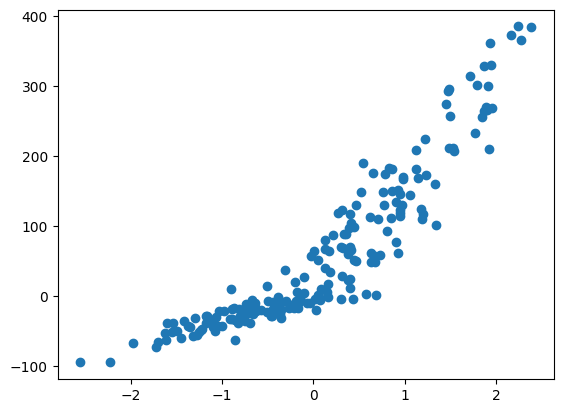

In [27]:
plt.scatter(X,y)

**Exercise:** Show correlation coefficients.

In [28]:
df.corr()

,x,y
x,1.000000,0.911229
y,0.911229,1.000000


As we can see, the coefficient of correlation remains important even if the dataset is not perfectly linear.

### Split the dataset


You now know the process!

**Exercise:** Import `train_test_split` from sklearn and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##  Load and fit the model (with scikit-learn)

This time there is a little change. 
We have a single feature in our dataset. The polynomial model is a special case of multiple regression. So we need several features to be able to apply polynomial regression. And these features, we'll have to add them ourselves. By the way, this way of doing things has a name: feature engineering.


Let's imagine that we want to have a 2-degree polynomial regression. 
So we will need to add a feature. 
This feature is simply an exponent of $x$.  
这次有一点变化。
我们的数据集中只有一个特征。多项式模型是多元回归的一个特例。因此，我们需要多个特征才能应用多项式回归。而这些特征，我们必须自己添加。顺便说一句，这种方法有个名字叫 “特征工程”。


假设我们想要进行 2 度多项式回归。
因此，我们需要添加一个特征。
这个特征就是 $x$ 的指数。 

$[x, x^2]$

So $x^2$ is the new feature.

If you want a 3-degree polynomial model, you will have to add 2 features in this case.

$[x, x^2, x^3]$

To do this, we will need to create a pipeline. 
A pipeline is a processing chain that will execute a set of functions and pass arguments between them.

First of all, we need to define the number of degrees.
 
**Exercise:** Create a `degree` variable with 1 as value. (We will change this value later)

In [30]:
degree = 2

**Exercise:** Create a pipeline with sklearn.This pipeline must contain the `PolynomialFeatures` and `LinearRegression` classes. Don't forget to set the number of degrees for the `PolynomialFeatures`


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [32]:
polyreg=make_pipeline(
    PolynomialFeatures(degree),
    LinearRegression(),
)

**Exercise:** Fit your model.

In [33]:
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**Exercise:** Use a scatter plot and display your predictions on `X_test`.

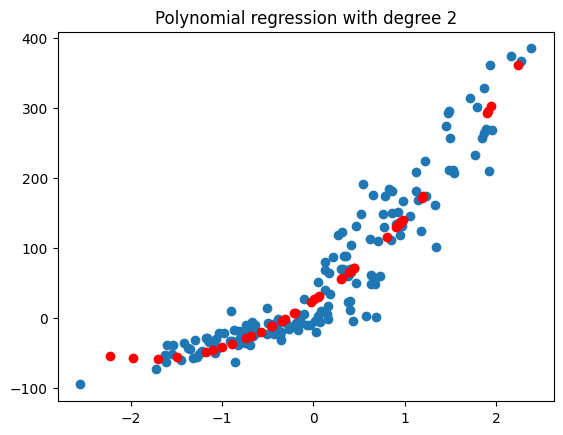

In [34]:
plt.figure()
plt.scatter(X_train,y_train)
plt.scatter(X_test, polyreg.predict(X_test),color="red")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

If you see a straight line it is because we have set the number of degrees to one. This confirms that the linear regression is indeed a polynomial model of degree 1.

**Exercise:** Change the number of degrees and train your model again. You must try to fit the curve as well as possible while limiting the number of degrees, to save some resources from your machine.

## From scratch

Again a few changes. This time we'll just have to add new features manually. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$

The $Y$ vector is the same too

$$Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$ 


The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

The $X$ initially looks like this: 

$$ X =
\begin{bmatrix}
x^{(1)}\\
x^{(2)}\\
x^{(3)}\\
x^{(m)}\\
\end{bmatrix}
$$

If we want to add a degree to the polynomial, it adds a feature to our $X$. And this feature will contain $x^2$.

Example of polynomial of degree 2:

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2\\
x^{(2)}_1, x^{(2)2}_2\\
x^{(3)}_1, x^{(3)2}_2\\
\dots, \dots\\
x^{(m)}_1,x^{(m)k}_2\\
\end{bmatrix}
$$

Example of polynomial of degree 3: (In this case the third feature will be of power 3.)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2, x^{(1)3}_3\\
x^{(2)}_1, x^{(2)2}_2, x^{(2)3}_3\\
x^{(3)}_1, x^{(3)2}_2, x^{(3)3}_3\\
\dots, \dots,\dots \\
x^{(m)}_1,x^{(m)2}_2, x^{(m)3}_3\\
\end{bmatrix}
$$

And so on and so forth. Of course, don't forget at the end to add a feature with only 1s.

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(2)}_1, x^{(2)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(3)}_1, x^{(3)2}_2, ..., x^{(m)k}_{n}, 1\\
x^{(m)}_1,x^{(m)k}_2, ..., x^{(m)k}_{n}, 1\\
\end{bmatrix}
$$

**Exercise:** Create a matrix `X` for a 3-degree polynomial $[x, x^2, x^3, 1]$

In [35]:
ones = np.ones(X.shape)
X = np.hstack((X, X**2, X**3, ones))

**Exercise:** Initialize the random `theta` vector, with 4 elements (because `X` has four columns).

In [36]:
theta = np.random.rand(4, 1).reshape(-1, 1)
theta

array([[0.91649209],
       [0.56768968],
       [0.25026563],
       [0.04878966]])

**Exercise:** Create the `model`. It is always the same:

$$Y = X \cdot \theta $$

In [37]:
def model(X, theta):
    return X.dot(theta)

**Exercise:** Create a `MSE` function. It is always the same too.

In [38]:
def MSE(X, y, theta):
    m = len(y)
    y_pred = model(X, theta)
    return 1/(2*m) * np.sum((y_pred - y)**2)

In [39]:
error = MSE(X, y, theta)
error

np.float64(7662.788565059204)

**Exercise:** Create a `grad` function. Again, it is always the same.

In [40]:
def grad(X, y, theta):
    m = len(y)
    y_pred = model(X, theta)
    return 1/m * X.T.dot(y_pred - y)

**Exercise:** 
Again...
1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate` and `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. Return `theta` and `cost_history`

In [41]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)

    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

### Train your model 

**Exercise:** Create variables `n_iterations` and `learning_rate`.

In [42]:
n_iterations = 1000
learning_rate = 0.01

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [43]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
theta_final

NameError: name 'cost_function' is not defined

**Exercise:** Create a `predictions` variable that contains `model(X, theta_final)`.


In [ ]:
predictions = model(X, theta_final)
print("X shape:", X.shape)

NameError: name 'model' is not defined

**Exercise:** Display your `predictions` and the true values of the dataset.

In [ ]:
plt.scatter(X[:,0], y)
plt.scatter(X[:,0], predictions, c='r')

It says it looks like this.

<img src="./assets/poly3.JPG" />

**Exercise:** Plot `cost_history`.

In [ ]:
plt.plot(range(len(cost_history)), cost_history)

In [ ]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [ ]:
coef_determination(y, predictions)

**Exercise:** Try to improve your model by adding a degree to your polynomial model.

Good, you must feel like this now: 

![](https://media.giphy.com/media/DHqth0hVQoIzS/giphy.gif)

## Where to go next?

Linear models might look simple but they can get very complicated. You might look into **Ridge Regression** or **Lasso Regression** if you want to further deepen your knowledge.

- [Statquest - Regularization explained (Lasso & Ridge)](https://youtu.be/Q81RR3yKn30)